In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
from scipy.misc import imread, imsave, imresize
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_files = [join('train',f) for f in listdir('train') if isfile(join('train', f)) and f.endswith('png')]
train_cleaned = [join('train_cleaned',f) for f in listdir('train_cleaned') if isfile(join('train_cleaned', f)) and f.endswith('png')]

In [3]:
trX = []
trY = []
orig_size = []

In [4]:
for fl in train_files:
    img = imread(fl)
    orig_size.append(img.shape)
    img = imresize(img, (200, 300))
    trX.append(img)

In [5]:
trX = np.array(trX)

In [6]:
trX.shape

(144, 200, 300)

In [7]:
trX[0]

array([[231, 231, 228, ..., 232, 233, 233],
       [224, 228, 228, ..., 230, 231, 234],
       [226, 228, 230, ..., 232, 229, 230],
       ..., 
       [224, 222, 219, ..., 226, 223, 222],
       [219, 217, 224, ..., 227, 224, 224],
       [225, 224, 227, ..., 231, 201, 163]], dtype=uint8)

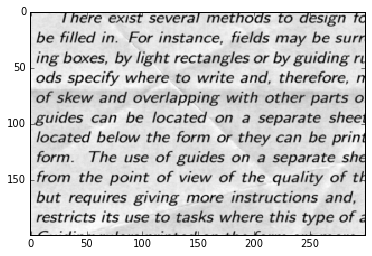

In [8]:
plt.imshow(trX[0], cmap='gray', interpolation='nearest') 

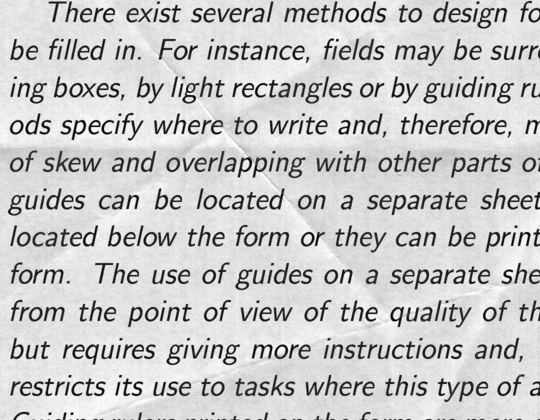

In [9]:
Image(train_files[0])

In [10]:
for fl in train_cleaned:
    img = imread(fl)
    img = imresize(img, (200, 300))
    trY.append(img)

In [11]:
trY = np.array(trY)
trY.shape

(144, 200, 300)

In [12]:
trX = trX/255.0
trY = trY/255.0

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trX, trY, test_size=0.3)

In [14]:
X_train.shape

(100, 200, 300)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D, UpSampling2D

Using Theano backend.


In [18]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu',input_shape=(1, 200, 300)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 3, 3, activation='relu', border_mode='same'))
model.add(UpSampling2D((2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
model.add(UpSampling2D((2, 2)))
model.add(Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same'))

In [27]:
from keras.optimizers import Adam
adam = Adam(lr=0.005)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 32, 200, 300)  320         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 32, 100, 150)  0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 16, 100, 150)  4624        maxpooling2d_5[0][0]             
____________________________________________________________________________________________________
maxpooling2d_6 (MaxPooling2D)    (None, 16, 50, 75)    0           convolution2d_8[0][0]            
___________________________________________________________________________________________

In [29]:
model.fit(X_train.reshape([-1,1,200,300]), y_train.reshape([-1,1,200,300]), nb_epoch=10, batch_size=8)

Epoch 1/10
100/100 [==============================] - 28s - loss: 0.3664 - acc: 0.5373    
Epoch 2/10
100/100 [==============================] - 28s - loss: 0.3295 - acc: 0.5373    
Epoch 3/10
100/100 [==============================] - 28s - loss: 0.2740 - acc: 0.5373    
Epoch 4/10
100/100 [==============================] - 28s - loss: 0.2603 - acc: 0.5373    
Epoch 5/10
100/100 [==============================] - 28s - loss: 0.2546 - acc: 0.5373    
Epoch 6/10
100/100 [==============================] - 28s - loss: 0.2479 - acc: 0.5373    
Epoch 7/10
100/100 [==============================] - 28s - loss: 0.2441 - acc: 0.5373    
Epoch 8/10
100/100 [==============================] - 28s - loss: 0.2412 - acc: 0.5373    
Epoch 9/10
100/100 [==============================] - 28s - loss: 0.2400 - acc: 0.5373    
Epoch 10/10
100/100 [==============================] - 29s - loss: 0.2377 - acc: 0.5373    


In [31]:
model.fit(X_train.reshape([-1,1,200,300]), y_train.reshape([-1,1,200,300]), nb_epoch=20, batch_size=8)

Epoch 1/20
100/100 [==============================] - 28s - loss: 0.2362 - acc: 0.5373    
Epoch 2/20
100/100 [==============================] - 28s - loss: 0.2350 - acc: 0.5373    
Epoch 3/20
100/100 [==============================] - 28s - loss: 0.2330 - acc: 0.5373    
Epoch 4/20
100/100 [==============================] - 28s - loss: 0.2329 - acc: 0.5373    
Epoch 5/20
100/100 [==============================] - 28s - loss: 0.2312 - acc: 0.5373    
Epoch 6/20
100/100 [==============================] - 29s - loss: 0.2306 - acc: 0.5373    
Epoch 7/20
100/100 [==============================] - 28s - loss: 0.2296 - acc: 0.5373    
Epoch 8/20
100/100 [==============================] - 28s - loss: 0.2286 - acc: 0.5373    
Epoch 9/20
100/100 [==============================] - 28s - loss: 0.2277 - acc: 0.5373    
Epoch 10/20
100/100 [==============================] - 28s - loss: 0.2281 - acc: 0.5373    
Epoch 11/20
100/100 [==============================] - 28s - loss: 0.2269 - acc: 0.5373  

In [32]:
model.evaluate(X_val.reshape([-1,1,200,300]), y_val.reshape([-1,1,200,300]), batch_size=16)

44/44 [==============================] - 4s     


[0.22412119534882632, 0.53680947152051062]

In [33]:
y_pred0 = model.predict(X_train[:1].reshape([-1,1,200,300]))

In [34]:
y_pred0 = y_pred0.reshape([200,300])

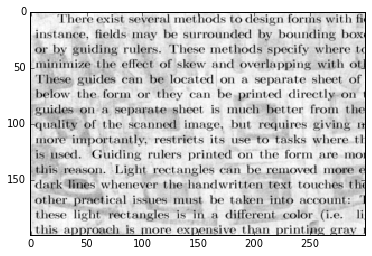

In [35]:
plt.imshow(X_train[0].reshape([200,300])*255.0, cmap='gray', interpolation='nearest') 

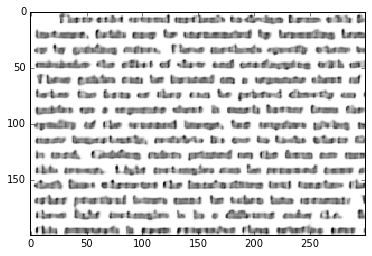

In [36]:
plt.imshow(y_pred0*255.0, cmap='gray', interpolation='nearest') 